# Image Processing to estimate dimensions of Fruit

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 999.5, 561.5, -0.5)

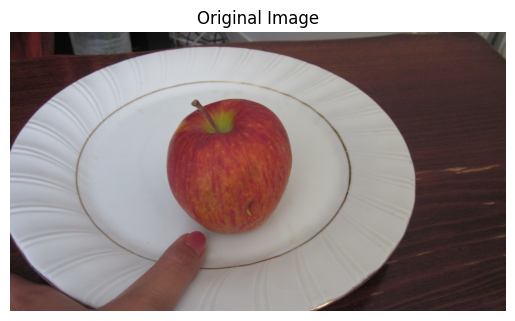

In [2]:
img1 = cv2.imread('7.jpg')
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title('Original Image')
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

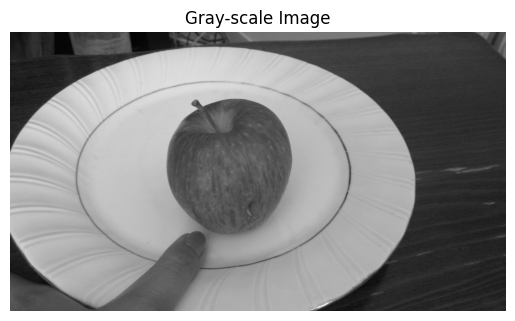

In [3]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.title("Gray-scale Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

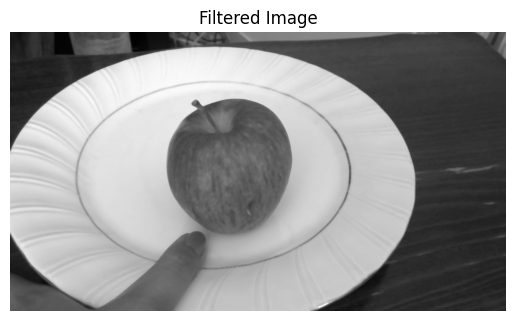

In [4]:
img_filt = cv2.medianBlur( img, 5)
plt.imshow(img_filt, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

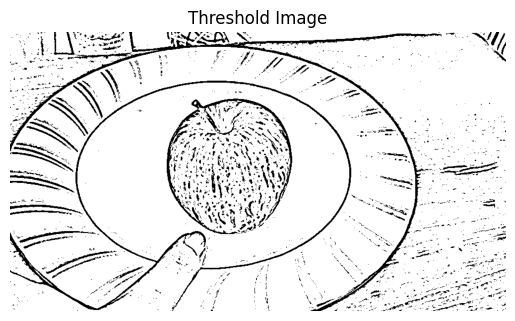

In [5]:
img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(img_th, cmap='gray')
plt.title("Threshold Image")
plt.axis("off")

In [6]:
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

(-0.5, 999.5, 561.5, -0.5)

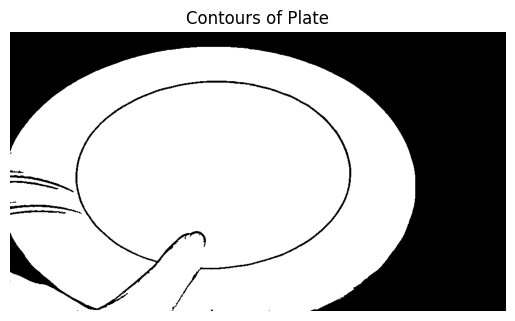

In [7]:
mask = np.zeros(img.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
plt.imshow(mask, cmap='gray')
plt.title("Contours of Plate")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

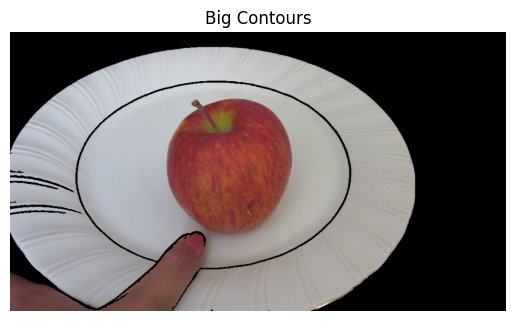

In [8]:
img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
plt.imshow(img_bigcontour[:,:,::-1])
plt.title("Big Contours")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

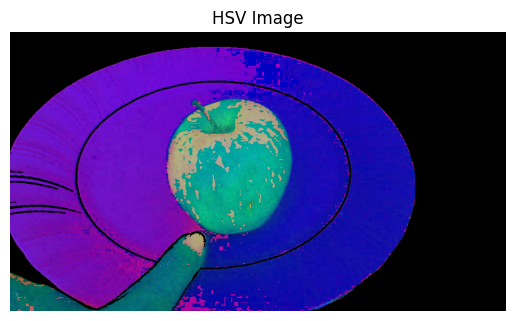

In [9]:
hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.title("HSV Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

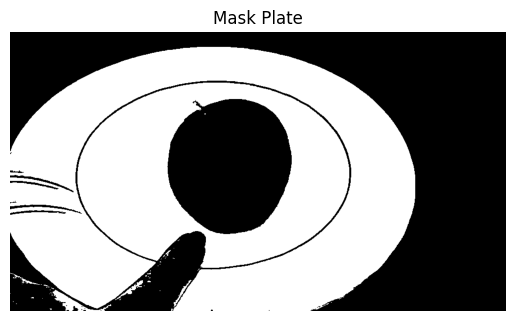

In [10]:
h,s,v = cv2.split(hsv_img)
mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
plt.imshow(mask_plate, cmap='gray')
plt.title("Mask Plate")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

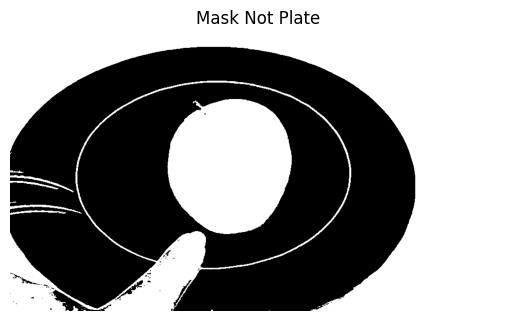

In [11]:
mask_not_plate = cv2.bitwise_not(mask_plate)
plt.imshow(mask_not_plate, cmap='gray')
plt.title("Mask Not Plate")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

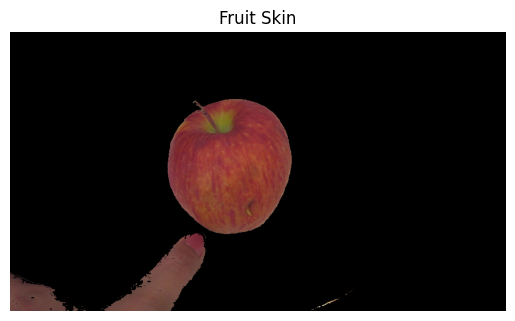

In [12]:
fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
plt.imshow(fruit_skin[:,:,::-1])
plt.title("Fruit Skin")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

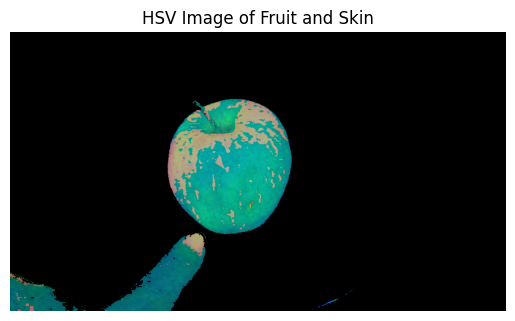

In [13]:
hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.title("HSV Image of Fruit and Skin")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

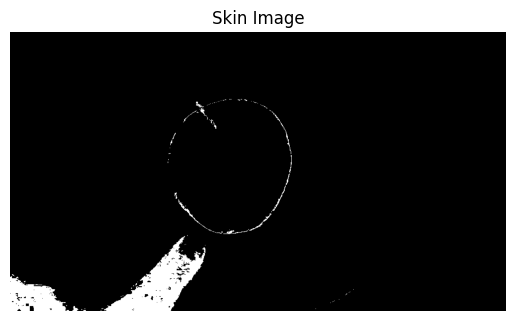

In [14]:
# skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([10,160,255]))
skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([10,120,255]))
plt.imshow(skin, cmap = 'gray')
plt.title("Skin Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

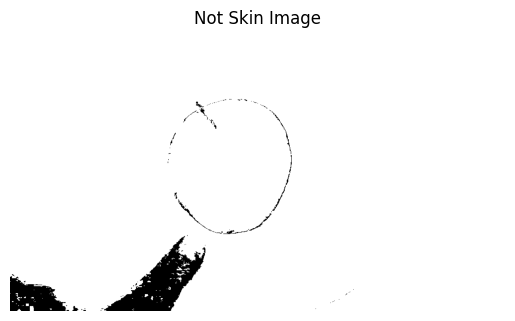

In [15]:
not_skin = cv2.bitwise_not(skin)
plt.imshow(not_skin, cmap = 'gray')
plt.title("Not Skin Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

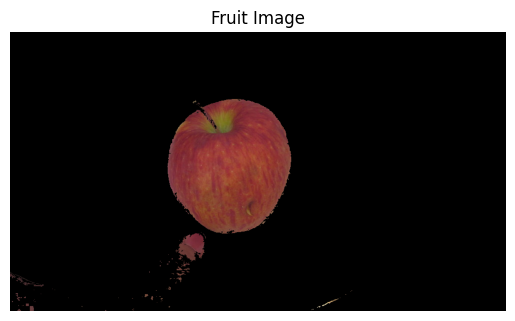

In [16]:
fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin)
plt.imshow(fruit[:,:,::-1])
plt.title("Fruit Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

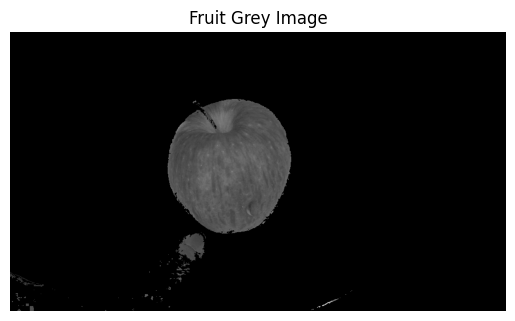

In [17]:
fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
plt.imshow(fruit_bw, cmap='gray')
plt.title("Fruit Grey Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

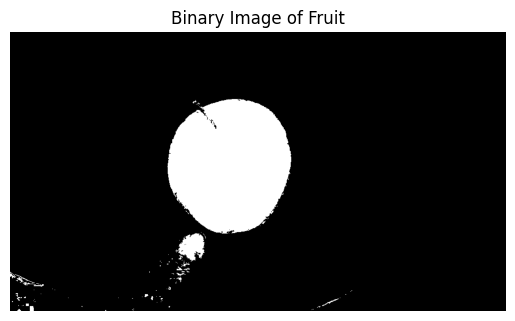

In [18]:
fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
plt.imshow(fruit_bin, cmap='gray')
plt.title("Binary Image of Fruit")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

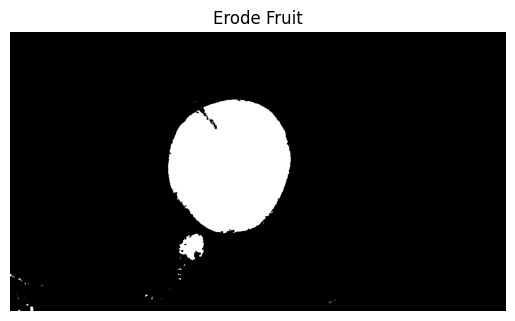

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
plt.imshow(erode_fruit, cmap = 'gray')
plt.title("Erode Fruit")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

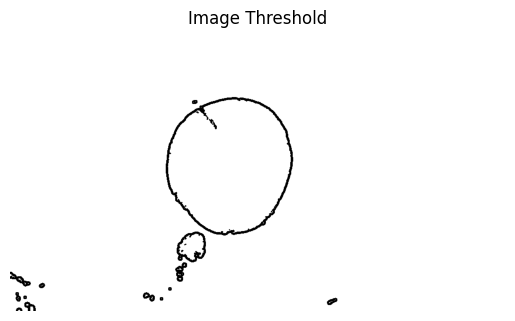

In [20]:
img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(img_th, cmap = 'gray')
plt.title("Image Threshold")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

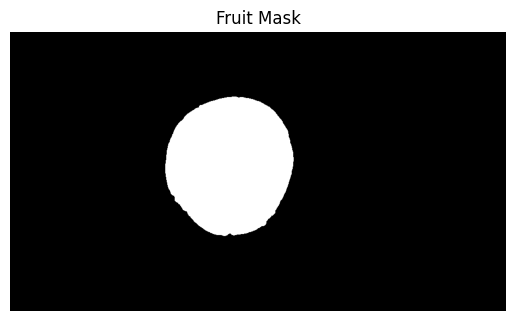

In [21]:
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)
plt.imshow(mask_fruit, cmap = 'gray')
plt.title("Fruit Mask")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

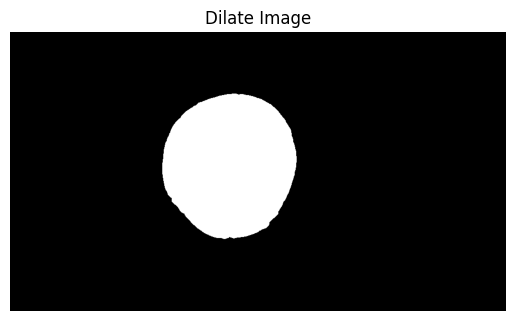

In [22]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
plt.imshow(mask_fruit2, cmap = 'gray')
plt.title("Dilate Image")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

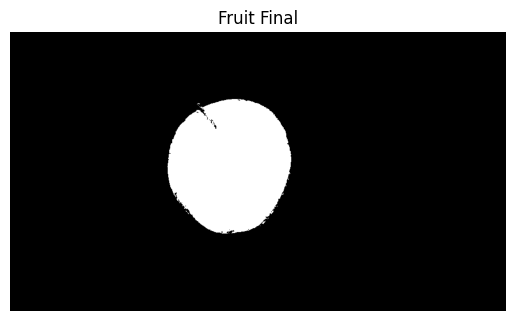

In [23]:
res = cv2.bitwise_and(fruit_bin,fruit_bin,mask = mask_fruit2)
plt.imshow(res, cmap = 'gray')
plt.title("Fruit Final")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

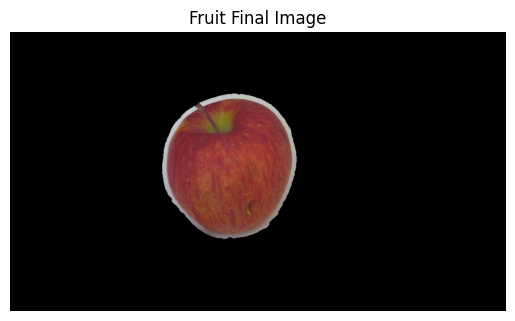

In [24]:
fruit_final = cv2.bitwise_and(img1,img1,mask = mask_fruit2)
plt.imshow(fruit_final[:,:,::-1])
plt.title("Fruit Final Image")
plt.axis("off")

Area of Fruit: 66372.0


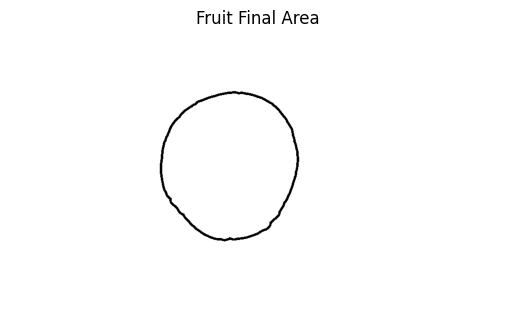

In [25]:
img_th = cv2.adaptiveThreshold(mask_fruit2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(img_th, cmap = 'gray')
plt.title("Fruit Final Area")
plt.axis("off")

contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
fruit_contour = largest_areas[-2]
fruit_area = cv2.contourArea(fruit_contour)
print("Area of Fruit:" ,fruit_area)

(-0.5, 999.5, 561.5, -0.5)

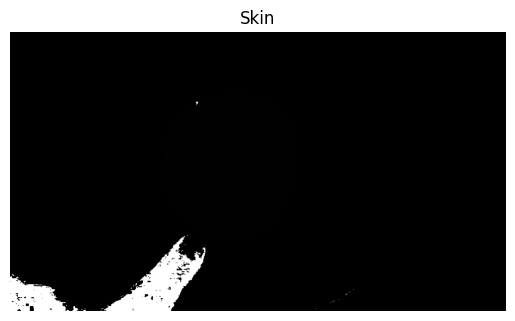

In [26]:
skin2 = skin - mask_fruit2
plt.imshow(skin2, cmap = 'gray')
plt.title("Skin")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

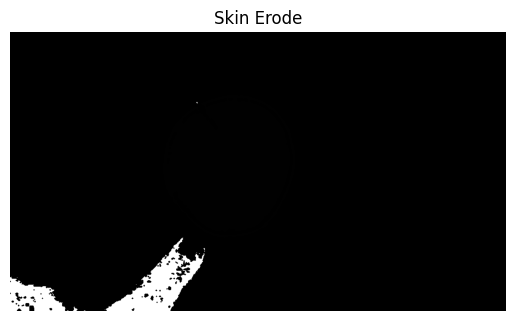

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
skin_e = cv2.erode(skin2,kernel,iterations = 1)
plt.imshow(skin_e, cmap = 'gray')
plt.title("Skin Erode")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

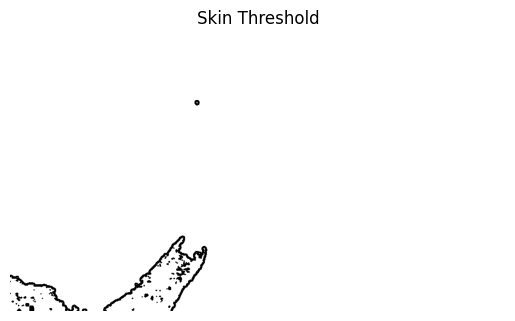

In [28]:
img_th = cv2.adaptiveThreshold(skin_e,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(img_th, cmap = 'gray')
plt.title("Skin Threshold")
plt.axis("off")

(-0.5, 999.5, 561.5, -0.5)

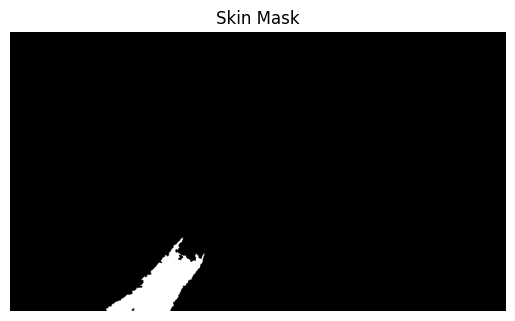

In [29]:
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask_skin = np.zeros(skin.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
cv2.drawContours(mask_skin, [largest_areas[-2]], 0, (255,255,255), -1)
plt.imshow(mask_skin, cmap = 'gray')
plt.title("Skin Mask")
plt.axis("off")

C:\Users\libin\AppData\Local\Temp\ipykernel_20856\3884557591.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


(-0.5, 999.5, 561.5, -0.5)

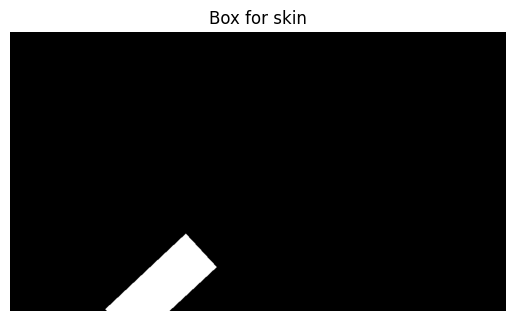

In [30]:
skin_rect = cv2.minAreaRect(largest_areas[-2])
box = cv2.boxPoints(skin_rect)
box = np.int0(box)
mask_skin2 = np.zeros(skin.shape, np.uint8)
cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
plt.imshow(mask_skin2, cmap = 'gray')
plt.title("Box for skin")
plt.axis("off")

In [31]:
pix_height = max(skin_rect[1])
pix_to_cm_multiplier = 5.0/pix_height
skin_area = cv2.contourArea(box)
print("Area of skin: ", skin_area)

Area of skin:  20166.0
